# Logistic Regression
学生录取问题：根据两次考试的成绩决定申请者是否被录取，你可用以前申请者的历史数据作为训练集，对于每个训练样本，你有申请人两次考试的分数和录取决定，我们将构建一个分类模型（逻辑回归），该模型根据考试分数来估计录取的概率。

In [1]:
import  numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

## 1 准备实验数据

In [2]:
#os.getcwd()
path="D:\PycharmProjects\Object_Detection_Funcs\Regression\Logistic Regression\data\ex2data1.txt"
data=pd.read_csv(path,header=None,names=['Exam 1','Exam 2','Admitted'])
data.head()

,Exam 1,Exam 2,Admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


Admitted为二值标签，1表示被录取，0表示未被录取。

## 2 可视化训练数据

Text(0,0.5,'Exam 2 Score')

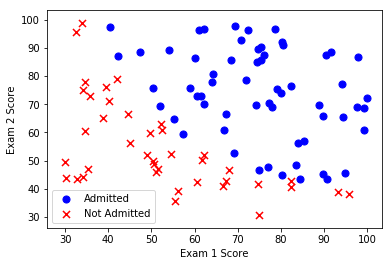

In [8]:
positive=data[data['Admitted'].isin([1])]
negative=data[data['Admitted'].isin([0])]

fig,ax=plt.subplots()
ax.scatter(positive['Exam 1'],positive['Exam 2'],s=50,c='b',marker='o',label='Admitted')
ax.scatter(negative['Exam 1'],negative['Exam 2'],s=50,c='r',marker='x',label='Not Admitted')
ax.legend()
ax.set_xlabel('Exam 1 Score')
ax.set_ylabel('Exam 2 Score')

## 3 Sigmoid

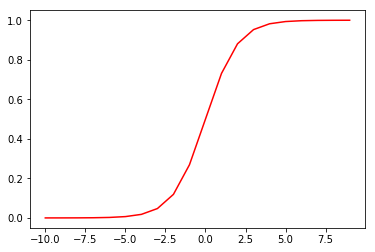

In [12]:
def sigmoid(z):
    return  1/(1+(np.exp(-z)))

nums=np.arange(-10,10,step=1)
#print(nums)
fig,ax=plt.subplots()
ax.plot(nums,sigmoid(nums),c='r')

## 4 损失函数 

In [42]:
def cost(weights,X,y):
    weights=np.matrix(weights)
    X=np.matrix(X)
    y=np.matrix(y)
    first=np.multiply(-y,np.log(sigmoid(X*weights.T)))
    second=np.multiply((1-y),np.log(1-sigmoid(X*weights.T)))
    return np.sum(first-second)/(len(X)) 

#data.insert(0,'Ones',1)
#data.shape[1]
# set X (training data) and y (target variable)
X=data.iloc[:,:3]
y=data.iloc[:,3:]
#print(X,'\n',y)
#convert to numpy arrays and initalize the parameter array theta
X=np.array(X.values)
y=np.array(y.values)
weights=np.zeros(3)
#print(X,'\n',y,'\n',weights)
print(X.shape)
print(weights.shape)
print(y.shape)
#Now let's compute the cost for our initial solution (0 values for weights).
cost(weights,X,y)

(100, 3)
(3,)
(100, 1)


0.6931471805599453

## 5 梯度下降法更新参数

In [114]:
def gradient(weights,X,y):
    weights=np.matrix(weights)
    X=np.matrix(X)
    y=np.matrix(y)
    
    parameters=weights.ravel().shape[1]
    grad=np.zeros(parameters)
    
    error=sigmoid(X*weights.T)-y
    
    for i in range(parameters):
        term=np.multiply(error,X[:,i])
        grad[i]=np.sum(term)/len(X)
    
    return  grad

gradient(weights,X,y)

import scipy.optimize as opt
result=opt.fmin_tnc(func=cost,x0=weights,fprime=gradient,args=(X,y))
result

(array([-25.16131872,   0.20623159,   0.20147149]), 1, 0)

In [115]:
cost(result[0],X,y)

0.20349770158947425

## 6 预测正确率

In [116]:
def predict(weights,X):
    pre=sigmoid(X*weights.T)
    return [1 if i>0.5 else 0 for i in pre]

weights=np.matrix(result[0])
pred=predict(weights,X)
correct=[1 if a==b else 0 for (a,b) in zip(pred,y)]
accuracy=(sum(correct))/len(correct)
print(np.sum(correct))
print('accuracy={0}%'.format(accuracy))

89
accuracy=0.89%


# Regularized logistic regression  

Suppose you are the product manager of the factory and you have the test results for some microchips on two different tests. From these two tests, you would like to determine whether the microchips should be accepted or rejected. To help you make the decision, you have a dataset of test results on past microchips, from which you can build a logistic regression model.

In [117]:
path2="D:\PycharmProjects\Object_Detection_Funcs\Regression\Logistic Regression\data\ex2data2.txt"
data2=pd.read_csv(path2,header=None,names=['Test 1','Test 2','Accepted'])
data2.head()

,Test 1,Test 2,Accepted
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


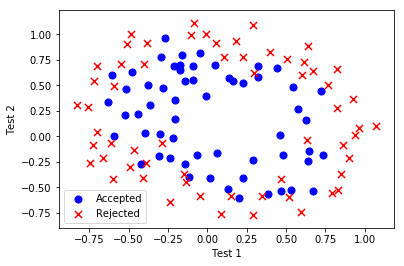

In [118]:
positive=data2[data2['Accepted'].isin([1])]
negative=data2[data2['Accepted'].isin([0])]

fig,ax=plt.subplots()
plt.scatter(positive['Test 1'],positive['Test 2'],s=50,c='b',marker='o',label='Accepted')
plt.scatter(negative['Test 1'],negative['Test 2'],s=50,c='r',marker='x',label='Rejected')
ax.set_xlabel('Test 1')
ax.set_ylabel('Test 2')
ax.legend()


This data looks a bit more complicated than the previous example. In particular, you'll notice that there is no linear decision boundary that will perform well on this data. One way to deal with this using a linear technique like logistic regression is to construct features that are derived from polynomials of the original features. Let's start by creating a bunch of polynomial features.


In [119]:
degree=5
x1=data2['Test 1']
x2=data2['Test 2']
data2.insert(3,'Ones',1)
data2.head()

for i in range(1,degree):
    for j in range(0,i):
        data2['F'+str(i)+str(j)]=np.power(x1,i-j)*np.power(x2,j)
        
data2.drop(['Test 1','Test 2'],axis=1,inplace=True)
data2.head()
        

,Accepted,Ones,F10,F20,F21,F30,F31,F32,F40,F41,F42,F43
0,1,1,0.051267,0.002628,0.035864,0.000135,0.001839,0.025089,0.000007,0.000094,0.001286,0.017551
1,1,1,-0.092742,0.008601,-0.063523,-0.000798,0.005891,-0.043509,0.000074,-0.000546,0.004035,-0.029801
2,1,1,-0.213710,0.045672,-0.147941,-0.009761,0.031616,-0.102412,0.002086,-0.006757,0.021886,-0.070895
3,1,1,-0.375000,0.140625,-0.188321,-0.052734,0.070620,-0.094573,0.019775,-0.026483,0.035465,-0.047494
4,1,1,-0.513250,0.263426,-0.238990,-0.135203,0.122661,-0.111283,0.069393,-0.062956,0.057116,-0.051818


In [120]:
def costReg(weights,X,y,learningrate):
    weights=np.matrix(weights)
    X=np.matrix(X)
    y=np.matrix(y)
    first=np.multiply(-y,np.log(sigmoid(X*weights.T)))
    second=np.multiply((1-y),np.log(1-sigmoid(X*weights.T)))
    #L2正则化项(注意没有正则化w_0)
    reg=(learningrate/(2*(len(X))))*(np.sum(np.power(weights[:,1:weights.shape[1]],2)))
    return np.sum((first-second)/len(X))+reg

In [121]:
def gradientReg(weights,X,y,learningrate):
    weights=np.matrix(weights)
    X=np.matrix(X)
    y=np.matrix(y)
    
    parameters=weights.ravel().shape[1]
    grad=np.zeros(parameters)
    
    error=sigmoid(X*weights.T)-y
    
    for i in range(parameters):
        
        term=np.multiply(error,X[:,i])
        if(i==0):
            grad[i]=np.sum(term)/len(X)      #因为没有正则化w_0,所以w_0单独处理
        else:
            grad[i]=np.sum(term)/len(X)+(learningrate/len(X))*weights[:,i]
    return  grad

# set X and y (remember from above that we moved the label to column 0)            
clos=data2.shape[1]
X2=data2.iloc[:,1:clos]
y2=data2.iloc[:,0:1]

# convert to numpy arrays and initalize the parameter array theta
X2 = np.array(X2.values)
y2 = np.array(y2.values)
weights2 = np.zeros(11)

learningrate=1
costReg(weights2,X2,y2,learningrate)
    
    
    
    

0.6931471805599451

In [122]:
result2=opt.fmin_tnc(func=costReg,fprime=gradientReg,x0=weights2,args=(X2,y2,learningrate))
result2

(array([ 0.53010248,  0.29075567, -1.60725764, -0.58213819,  0.01781027,
        -0.21329508, -0.40024142, -1.37144139,  0.02264304, -0.9503358 ,
         0.0344085 ]), 22, 1)

In [123]:
weights2=np.matrix(result2[0])
X2=np.matrix(X2)
pre_q=[1 if i>=0.5 else 0 for i in sigmoid(X2*weights2.T)]
correct_q=[1 if a==b else 0 for (a,b) in zip(pre_q,np.matrix(y2))]
print(correct_q)
accuracy_q=np.sum(correct_q)/len(X2)
print(np.sum(correct_q),len(X2))
print(accuracy_q)


[1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1]
78 118
0.6610169491525424


**Although we implemented these algorithms from scratch, it's worth noting that we could also use a high-level python library like scikit-learn to solve this problem**

In [124]:
from  sklearn import linear_model
model=linear_model.LogisticRegression(penalty='l2',C=1.0)
model.fit(X2,y2.ravel())
model.score(X2,y2)

F:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.6610169491525424